In [9]:
from IPython.display import Image
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from struct import *

#############################################################################################################

def download(dir):
    
    # 다운로드와 압축풀기
    dir_str = dir + '/MNIST_dataset/'
    
    mnist_train = dsets.MNIST(root = dir_str,
                         train = True,
                         transform = transforms.ToPILImage(mode=None),
                         download = True)

    mnist_test = dsets.MNIST(root = dir_str,
                         train = False,
                         transform = transforms.ToPILImage(mode=None),
                         download = True)
    
#############################################################################################################
    
    #디렉토리 생성
    dir_main = dir + '/mnist_dataset/'
    if not os.path.exists(dir_main):
        os.mkdir(dir_main)
    
    dir_train = dir_main + '/train/'
    if not os.path.exists(dir_train):
        os.mkdir(dir_train)
        
    dir_test = dir_main + '/test/'
    if not os.path.exists(dir_test):
        os.mkdir(dir_test)
        
    for i in range(10):
        labelnumberdir1 = dir_train + str(i)+'/'
        if not os.path.exists(labelnumberdir1):
            os.mkdir(labelnumberdir1)
        labelnumberdir2 = dir_test + str(i)+'/'
        if not os.path.exists(labelnumberdir2):
            os.mkdir(labelnumberdir2)
            
#############################################################################################################

    # 파일 읽기
    print("working on it!")
    fp1_image = open(dir + '/MNIST_dataset/MNIST/raw/train-images-idx3-ubyte','rb')
    fp1_label = open(dir + '/MNIST_dataset/MNIST/raw/train-labels-idx1-ubyte','rb')
    fp2_image = open(dir + '/MNIST_dataset/MNIST/raw/t10k-images-idx3-ubyte','rb')
    fp2_label = open(dir + '/MNIST_dataset/MNIST/raw/t10k-labels-idx1-ubyte','rb')
    
    #train set과 test set의 필요없는 부분 날린다.
    s = fp1_image.read(16)    #read first 16byte
    l = fp1_label.read(8)     #read first  8byte
    s_t = fp2_image.read(16)
    l_t = fp2_label.read(8)
    
#############################################################################################################
    
    #숫자 데이터를 읽어서 해당하는 데이터를 이미지로 변환 후 해당 디렉토리에 저장   
    
    #데이터 넣을 리스트 준비
    lbl_train = [ [],[],[],[],[],[],[],[],[],[] ] #레이블별로 저장 (0 ~ 9)
    lbl_test = [ [],[],[],[],[],[],[],[],[],[] ]
    
    # 10000개의 test dataset 이미지 변환
    for i in range(10000):

        s_t = fp2_image.read(784)
        l_t = fp2_label.read(1)
            
        if not s_t:
            break;
        if not l_t:
            break;

        index_test = int(l_t[0]) #레이블값 읽기
        
        #unpack
        img_t = np.reshape(unpack(len(s_t)*'B',s_t), (28,28))
        lbl_test[index_test].append(img_t)

        #save image
        savename = str(i)+"mnist.jpg"
        index_test_str = str(index_test)
        plt.imshow(img_t,cmap = cm.binary)
        plt.axis('off')
        fig2 = plt.gcf()
        fig2.savefig(fname = dir_test+index_test_str+'/'+savename, bbox_inches='tight', pad_inches=0)
    
    print("test set done!")
    
#############################################################################################################

    # 60000개의 test dataset 이미지 변환
    for i in range(60000):  #k를 0~9까지 돌리기 위함

        s = fp1_image.read(784) #784바이트씩 읽음    784 = 28 * 28
        l = fp1_label.read(1)   #1바이트씩 읽음

        if not s:
            break;
        if not l:
            break;

        index_train = int(l[0]) #레이블값 읽기

        #unpack
        img = np.reshape(unpack(len(s)*'B',s), (28,28))       #unpack(format, string)
        lbl_train[index_train].append(img) #각 숫자영역별로 해당이미지를 추가

        #save image
        savename = str(i)+"mnist.jpg"
        index_train_str = str(index_train)
        plt.imshow(img, cmap = cm.binary) #binary형태의 이미지 설정
        plt.axis('off')
        fig = plt.gcf()
        fig.savefig(fname = dir_train+index_train_str+'/'+savename, bbox_inches='tight', pad_inches=0)      

    print("train set done!")
    
#############################################################################################################

    print("COMPLETE!")

In [10]:
pwd

'C:\\Users\\USER\\Jupyter Notebook\\RP_Lab _DL'

In [ ]:
download('C:\\Users\\USER\\Jupyter Notebook\\RP_Lab _DL')


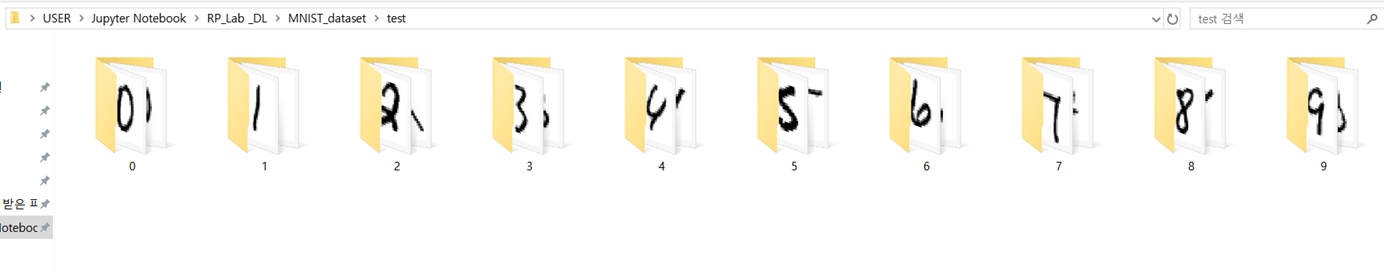